In [2]:
# import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import libraries for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
file = 'Data/combined.csv'
df = pd.read_csv(file)


In [4]:
data = df 
# drop all columns except title, 0.5. 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0

# make a new df with only title, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0
df = df[['title', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']]
# remve the first index column
# df = df.drop(df.columns[0], axis=1)
df

,title,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,Toy Story (1995),478,840,468,2160,1665,11872,6095,22710,5684,16497
1,Jumanji (1995),276,813,542,2551,1902,8711,3116,6303,790,2139
2,Grumpier Old Men (1995),174,777,237,1677,629,6227,774,3440,159,1491
3,Waiting to Exhale (1995),48,352,31,497,77,1136,68,557,12,211
4,Father of the Bride Part II (1995),248,802,282,1737,681,6655,761,2989,174,1145
...,...,...,...,...,...,...,...,...,...,...,...
58093,The Great Glinka (1946),0,0,0,0,0,1,0,0,0,0
58094,Les tribulations d'une caissière (2011),0,0,0,1,0,0,0,0,0,0
58095,Her Name Was Mumu (2016),0,0,0,1,0,0,0,0,0,0
58096,Flora (2017),0,0,0,1,0,0,0,0,0,0


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis



df = pd.DataFrame(data)

# convert all columns 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0 to float
df['0.5'] = df['0.5'].astype(float)
df['1.0'] = df['1.0'].astype(float)
df['1.5'] = df['1.5'].astype(float)
df['2.0'] = df['2.0'].astype(float)
df['2.5'] = df['2.5'].astype(float)
df['3.0'] = df['3.0'].astype(float)
df['3.5'] = df['3.5'].astype(float)
df['4.0'] = df['4.0'].astype(float)
df['4.5'] = df['4.5'].astype(float)
df['5.0'] = df['5.0'].astype(float)


# calculate mean rating
df['mean_rating'] = (df['0.5']*0.5 + df['1.0']*1 + df['1.5']*1.5 + df['2.0']*2 + df['2.5']*2.5 + df['3.0']*3 + df['3.5']*3.5 + df['4.0']*4 + df['4.5']*4.5 + df['5.0']*5) / df.sum(axis=1)
df = df[df['mean_rating'] >= 0.25]
# calculate variance of ratings
df['variance'] = np.var(df.iloc[:,1:], axis=1)
df = df[df['variance'] >= 0.1e9]

# calculate skewness of ratings

df


/tmp/ipykernel_45533/746171033.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['mean_rating'] = (df['0.5']*0.5 + df['1.0']*1 + df['1.5']*1.5 + df['2.0']*2 + df['2.5']*2.5 + df['3.0']*3 + df['3.5']*3.5 + df['4.0']*4 + df['4.5']*4.5 + df['5.0']*5) / df.sum(axis=1)
/home/prayush/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/tmp/ipykernel_45533/746171033.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,Unnamed: 0,movieId,title,genre,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,mean_rating,variance
293,293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,516.0,2032.0,310.0,2573.0,1003.0,9609.0,4596.0,22604.0,11705.0,37458.0,4.147535,1.217090e+08
315,315,318,"Shawshank Redemption, The (1994)",Crime|Drama,369.0,441.0,224.0,950.0,875.0,5668.0,4384.0,22216.0,14110.0,48762.0,4.395794,1.931900e+08
352,352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,496.0,1421.0,496.0,2982.0,1780.0,12559.0,6835.0,27799.0,10663.0,32009.0,4.027203,1.116367e+08
587,587,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,611.0,874.0,305.0,1608.0,1056.0,8773.0,5901.0,28340.0,10151.0,30280.0,4.096420,1.072931e+08
10449,10449,37729,Corpse Bride (2005),Animation|Comedy|Fantasy|Musical|Romance,99.0,97.0,124.0,311.0,535.0,1328.0,1742.0,2050.0,832.0,684.0,0.495481,1.051080e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27545,27545,122882,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,314.0,242.0,181.0,467.0,559.0,1337.0,1729.0,2985.0,2252.0,2917.0,0.304287,1.132474e+09
27547,27547,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,276.0,230.0,169.0,403.0,552.0,1391.0,1970.0,3313.0,1942.0,2501.0,0.296430,1.132948e+09
27556,27556,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,257.0,223.0,156.0,454.0,544.0,1350.0,1809.0,3199.0,2064.0,3059.0,0.309424,1.132768e+09
31988,31988,134130,The Martian (2015),Adventure|Drama|Sci-Fi,102.0,105.0,80.0,283.0,437.0,1295.0,2224.0,4845.0,3161.0,3628.0,0.358507,1.346845e+09


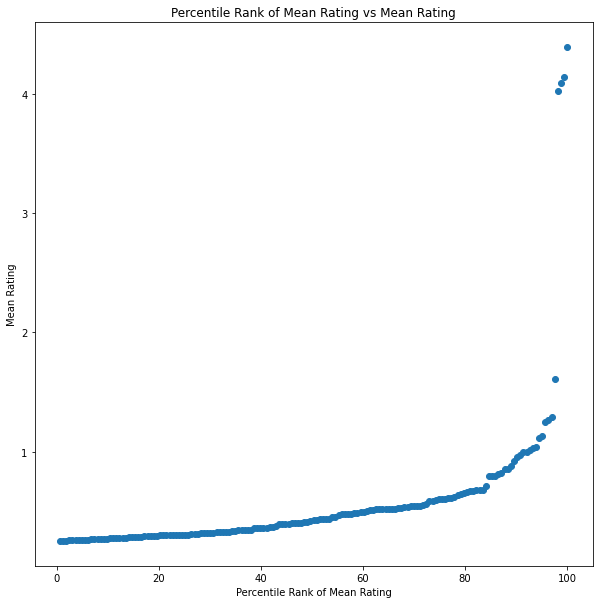

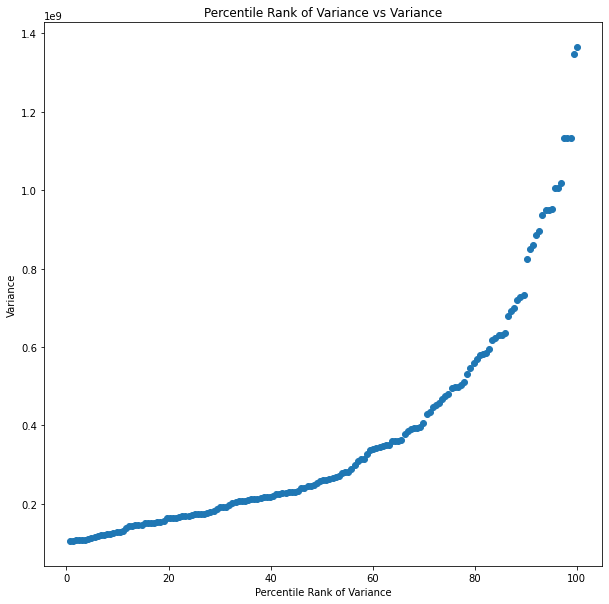

In [6]:
# make a new column 'rank_mr' with the rank of mean_rating and 'rank_var' with the rank of variance and also columns for the perceile rank of mean_rating and variance
df['rank_mr'] = df['mean_rating'].rank(ascending=False)
df['rank_var'] = df['variance'].rank(ascending=False)
df['pr_mr'] = df['mean_rating'].rank(pct=True)
df['pr_var'] = df['variance'].rank(pct=True)

# remove all values with mean_rating < 0.25


# make plot of percentile rank of mean_rating vs mean rating
plt.figure(figsize=(10,10))
plt.scatter(df['pr_mr']*100, df['mean_rating'])
plt.ylabel('Mean Rating')
plt.xlabel('Percentile Rank of Mean Rating')
plt.title('Percentile Rank of Mean Rating vs Mean Rating')
plt.show()

# make plot of percentile rank of variance vs variance
plt.figure(figsize=(10,10))
plt.scatter(df['pr_var']*100, df['variance'])
plt.ylabel('Variance')
plt.xlabel('Percentile Rank of Variance')
plt.title('Percentile Rank of Variance vs Variance')
plt.show()



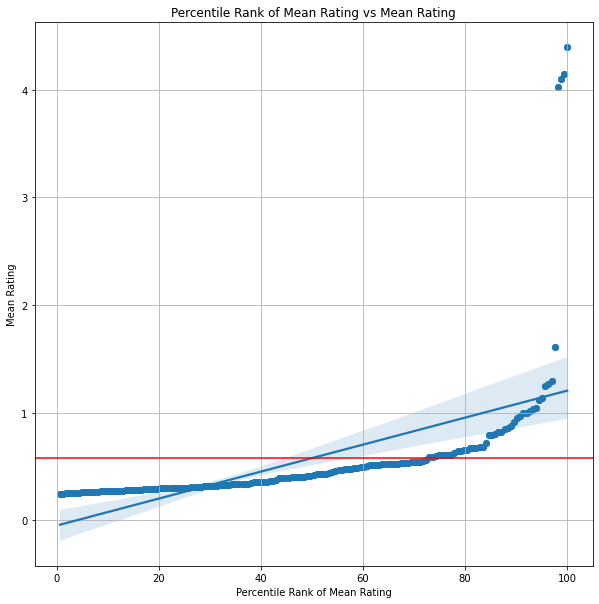

<Figure size 432x288 with 0 Axes>

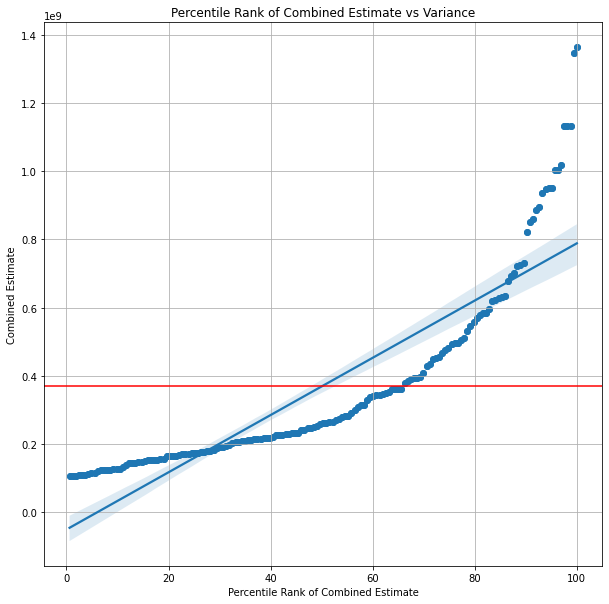

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the percentile rating of mean_rating vs mean rating using sns regplot
plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(df['pr_mr']*100, df['mean_rating'])
sns.regplot(x=df['pr_mr']*100, y=df['mean_rating'], data=df)
# make line for mean mean_rating
plt.axhline(y=df['mean_rating'].mean(), color='r', linestyle='-')
plt.ylabel('Mean Rating')
plt.xlabel('Percentile Rank of Mean Rating')
plt.title('Percentile Rank of Mean Rating vs Mean Rating')
plt.show()
# save the plot as a png file
plt.savefig('mean_rating.png')


plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(df['pr_var']*100, df['variance'])
sns.regplot(x=df['pr_var']*100, y=df['variance'], data=df)
# make a line for mean variance
plt.axhline(y=df['variance'].mean(), color='r', linestyle='-')
plt.ylabel('Combined Estimate')
plt.xlabel('Percentile Rank of Combined Estimate')
plt.title('Percentile Rank of Combined Estimate vs Variance')
plt.show()
# save the plot as a png file
plt.savefig('variance.png')



In [8]:
# calculate the skewness the fields '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0'
df['skewness'] = skew(df.iloc[:,5:14], axis=1)
df['kurtosis'] = kurtosis(df.iloc[:,5:14], axis=1)


# make a list of movies with 50 most variance
var_50 = df.nlargest(50, 'variance')
var_50.head()


,Unnamed: 0,movieId,title,genre,0.5,1.0,1.5,2.0,2.5,3.0,...,4.5,5.0,mean_rating,variance,rank_mr,rank_var,pr_mr,pr_var,skewness,kurtosis
32293,32293,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,212.0,160.0,102.0,361.0,446.0,1288.0,...,2344.0,3335.0,0.299193,1.365197e+09,128.0,1.0,0.220859,1.000000,0.464955,-1.273861
31988,31988,134130,The Martian (2015),Adventure|Drama|Sci-Fi,102.0,105.0,80.0,283.0,437.0,1295.0,...,3161.0,3628.0,0.358507,1.346845e+09,99.0,2.0,0.398773,0.993865,0.531703,-1.143654
27547,27547,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,276.0,230.0,169.0,403.0,552.0,1391.0,...,1942.0,2501.0,0.296430,1.132948e+09,133.0,3.0,0.190184,0.987730,0.378906,-1.146653
27556,27556,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,257.0,223.0,156.0,454.0,544.0,1350.0,...,2064.0,3059.0,0.309424,1.132768e+09,120.0,4.0,0.269939,0.981595,0.383462,-1.312371
27545,27545,122882,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,314.0,242.0,181.0,467.0,559.0,1337.0,...,2252.0,2917.0,0.304287,1.132474e+09,124.0,5.0,0.245399,0.975460,0.293930,-1.459271


In [9]:
df

,Unnamed: 0,movieId,title,genre,0.5,1.0,1.5,2.0,2.5,3.0,...,4.5,5.0,mean_rating,variance,rank_mr,rank_var,pr_mr,pr_var,skewness,kurtosis
293,293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,516.0,2032.0,310.0,2573.0,1003.0,9609.0,...,11705.0,37458.0,4.147535,1.217090e+08,2.0,153.0,0.993865,0.067485,1.323269,0.525337
315,315,318,"Shawshank Redemption, The (1994)",Crime|Drama,369.0,441.0,224.0,950.0,875.0,5668.0,...,14110.0,48762.0,4.395794,1.931900e+08,1.0,113.0,1.000000,0.312883,1.640845,1.496610
352,352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,496.0,1421.0,496.0,2982.0,1780.0,12559.0,...,10663.0,32009.0,4.027203,1.116367e+08,4.0,157.0,0.981595,0.042945,0.953520,-0.603657
587,587,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,611.0,874.0,305.0,1608.0,1056.0,8773.0,...,10151.0,30280.0,4.096420,1.072931e+08,3.0,159.0,0.987730,0.030675,1.033769,-0.557597
10449,10449,37729,Corpse Bride (2005),Animation|Comedy|Fantasy|Musical|Romance,99.0,97.0,124.0,311.0,535.0,1328.0,...,832.0,684.0,0.495481,1.051080e+08,67.0,163.0,0.595092,0.006135,0.558111,-1.053857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27545,27545,122882,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,314.0,242.0,181.0,467.0,559.0,1337.0,...,2252.0,2917.0,0.304287,1.132474e+09,124.0,5.0,0.245399,0.975460,0.293930,-1.459271
27547,27547,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,276.0,230.0,169.0,403.0,552.0,1391.0,...,1942.0,2501.0,0.296430,1.132948e+09,133.0,3.0,0.190184,0.987730,0.378906,-1.146653
27556,27556,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,257.0,223.0,156.0,454.0,544.0,1350.0,...,2064.0,3059.0,0.309424,1.132768e+09,120.0,4.0,0.269939,0.981595,0.383462,-1.312371
31988,31988,134130,The Martian (2015),Adventure|Drama|Sci-Fi,102.0,105.0,80.0,283.0,437.0,1295.0,...,3161.0,3628.0,0.358507,1.346845e+09,99.0,2.0,0.398773,0.993865,0.531703,-1.143654


In [10]:
# find movies for which number of 0.5 ratings + 1.0 ratings is more than 30% of total ratings and number of 4.5 ratings + 5.0 ratings is more than 30% of total ratings
df['0.5+1.0'] = df['0.5'] + df['1.0']
df['4.5+5.0'] = df['4.5'] + df['5.0']

df['0.5+1.0'] = df['0.5+1.0'].astype(float)
df['4.5+5.0'] = df['4.5+5.0'].astype(float)



df['0.5+1.0'] = df['0.5+1.0'] / df.sum(axis=1)
df['4.5+5.0'] = df['4.5+5.0'] / df.sum(axis=1)

# make df polar with movies with 200 highest 0.5 + 1.0 ratings and 200 highest 4.5 + 5.0 ratings
polar_min = df.nlargest(100, '0.5+1.0')
polar_max = df.nlargest(100, '4.5+5.0')


# make a new df polar with common movies in polar_min and polar_max
polar = pd.merge(polar_min, polar_max, on='movieId')
polar


/tmp/ipykernel_45533/4165678693.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['0.5+1.0'] = df['0.5+1.0'] / df.sum(axis=1)
/tmp/ipykernel_45533/4165678693.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['4.5+5.0'] = df['4.5+5.0'] / df.sum(axis=1)


,Unnamed: 0_x,movieId,title_x,genre_x,0.5_x,1.0_x,1.5_x,2.0_x,2.5_x,3.0_x,...,mean_rating_y,variance_y,rank_mr_y,rank_var_y,pr_mr_y,pr_var_y,skewness_y,kurtosis_y,0.5+1.0_y,4.5+5.0_y
0,293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,516.0,2032.0,310.0,2573.0,1003.0,9609.0,...,4.147535,1.217090e+08,2.0,153.0,0.993865,0.067485,1.323269,0.525337,2.091028e-05,0.000403
1,352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,496.0,1421.0,496.0,2982.0,1780.0,12559.0,...,4.027203,1.116367e+08,4.0,157.0,0.981595,0.042945,0.953520,-0.603657,1.714988e-05,0.000382
2,587,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,611.0,874.0,305.0,1608.0,1056.0,8773.0,...,4.096420,1.072931e+08,3.0,159.0,0.987730,0.030675,1.033769,-0.557597,1.382370e-05,0.000376
3,11376,48385,Borat: Cultural Learnings of America for Make ...,Comedy,717.0,537.0,404.0,828.0,916.0,1964.0,...,0.640852,1.702802e+08,36.0,125.0,0.785276,0.239264,0.666626,-0.498231,7.360947e-06,0.000018
4,10620,40815,Harry Potter and the Goblet of Fire (2005),Adventure|Fantasy|Thriller|IMAX,347.0,257.0,233.0,575.0,874.0,2440.0,...,1.032277,1.191295e+08,12.0,154.0,0.932515,0.061350,0.513031,-0.793950,5.066815e-06,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,10651,41285,Match Point (2005),Crime|Drama|Romance,51.0,51.0,57.0,176.0,262.0,626.0,...,0.330491,1.275098e+08,109.0,147.0,0.337423,0.104294,0.672773,-0.543490,7.995704e-07,0.000011
76,15096,76093,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX,182.0,159.0,121.0,287.0,421.0,1391.0,...,0.518816,4.293001e+08,62.0,49.0,0.625767,0.705521,0.471910,-1.045683,7.941113e-07,0.000012
77,12444,57669,In Bruges (2008),Comedy|Crime|Drama|Thriller,100.0,90.0,85.0,279.0,417.0,1026.0,...,0.512849,2.465161e+08,64.0,86.0,0.613497,0.478528,0.615107,-0.699373,7.704756e-07,0.000015
78,17608,88125,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX,245.0,199.0,122.0,390.0,428.0,1382.0,...,0.435926,5.784389e+08,78.0,32.0,0.527607,0.809816,0.443231,-1.258014,7.674175e-07,0.000009


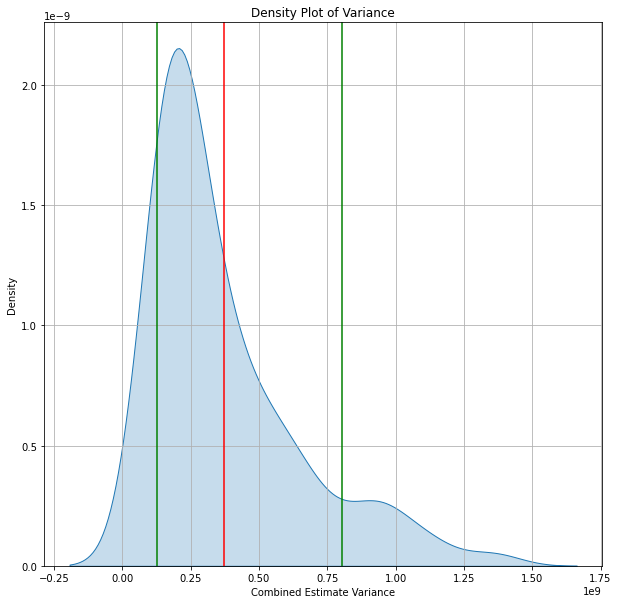

count    1.630000e+02
mean     3.710878e+08
std      2.752357e+08
min      1.051080e+08
25%      1.732819e+08
50%      2.606057e+08
75%      4.874559e+08
max      1.365197e+09
Name: variance, dtype: float64


<Figure size 432x288 with 0 Axes>

In [16]:
# make a shaded line density plot of variance vs movies
plt.figure(figsize=(10,10))
sns.kdeplot(df['variance'], shade=True)
# make a vertical line for mean variance
plt.axvline(x=df['variance'].mean(), color='r', linestyle='-')
# make lines for the 10th and 90th percentile of variance
plt.axvline(x=df['variance'].quantile(0.1), color='g', linestyle='-')
plt.axvline(x=df['variance'].quantile(0.9), color='g', linestyle='-')
plt.grid()
plt.ylabel('Density')
plt.xlabel('Combined Estimate Variance')
plt.title('Density Plot of Variance')
plt.show()
# save the plot as a png file

print(df.iloc[:,15].describe())



In [12]:
df.head()

,Unnamed: 0,movieId,title,genre,0.5,1.0,1.5,2.0,2.5,3.0,...,mean_rating,variance,rank_mr,rank_var,pr_mr,pr_var,skewness,kurtosis,0.5+1.0,4.5+5.0
293,293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,516.0,2032.0,310.0,2573.0,1003.0,9609.0,...,4.147535,1.217090e+08,2.0,153.0,0.993865,0.067485,1.323269,0.525337,0.000021,0.000403
315,315,318,"Shawshank Redemption, The (1994)",Crime|Drama,369.0,441.0,224.0,950.0,875.0,5668.0,...,4.395794,1.931900e+08,1.0,113.0,1.000000,0.312883,1.640845,1.496610,0.000004,0.000325
352,352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,496.0,1421.0,496.0,2982.0,1780.0,12559.0,...,4.027203,1.116367e+08,4.0,157.0,0.981595,0.042945,0.953520,-0.603657,0.000017,0.000382
587,587,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,611.0,874.0,305.0,1608.0,1056.0,8773.0,...,4.096420,1.072931e+08,3.0,159.0,0.987730,0.030675,1.033769,-0.557597,0.000014,0.000376
10449,10449,37729,Corpse Bride (2005),Animation|Comedy|Fantasy|Musical|Romance,99.0,97.0,124.0,311.0,535.0,1328.0,...,0.495481,1.051080e+08,67.0,163.0,0.595092,0.006135,0.558111,-1.053857,0.000002,0.000014


In [20]:
df_skew = df.nlargest(100, 'skewness')

# make a list of movies with 100 highest skewness and store it in a txt file
df_skew['movieId'].to_csv('skewness.txt', index=False, header=False)


df_kurt = df.nlargest(100, 'kurtosis')

# make a list of movies with 100 highest kurtosis and store it in a txt file
df_kurt['movieId'].to_csv('kurtosis.txt', index=False, header=False)


In [13]:
# make a dictionary of movies, with the title as key another dictionary as value with key as list of genres split by '|' and value as mean_rating
movies = {}
for i in range(len(df)):
    movies[df.iloc[i,2]] = {'genres': df.iloc[i,3].split('|'), 'variance': df.iloc[i,15]}
movies


{'Pulp Fiction (1994)': {'genres': ['Comedy', 'Crime', 'Drama', 'Thriller'],
  'variance': 121709047.55331872},
 'Shawshank Redemption, The (1994)': {'genres': ['Crime', 'Drama'],
  'variance': 193189980.03405285},
 'Forrest Gump (1994)': {'genres': ['Comedy', 'Drama', 'Romance', 'War'],
  'variance': 111636727.60800417},
 'Silence of the Lambs, The (1991)': {'genres': ['Crime',
   'Horror',
   'Thriller'],
  'variance': 107293074.6096135},
 'Corpse Bride (2005)': {'genres': ['Animation',
   'Comedy',
   'Fantasy',
   'Musical',
   'Romance'],
  'variance': 105107995.37675416},
 'History of Violence, A (2005)': {'genres': ['Action',
   'Crime',
   'Drama',
   'Thriller'],
  'variance': 106195157.25449209},
 'Capote (2005)': {'genres': ['Crime', 'Drama'],
  'variance': 106634985.20020473},
 'Wallace & Gromit in The Curse of the Were-Rabbit (2005)': {'genres': ['Adventure',
   'Animation',
   'Children',
   'Comedy'],
  'variance': 107601484.25543557},
 'Kiss Kiss Bang Bang (2005)': {'ge

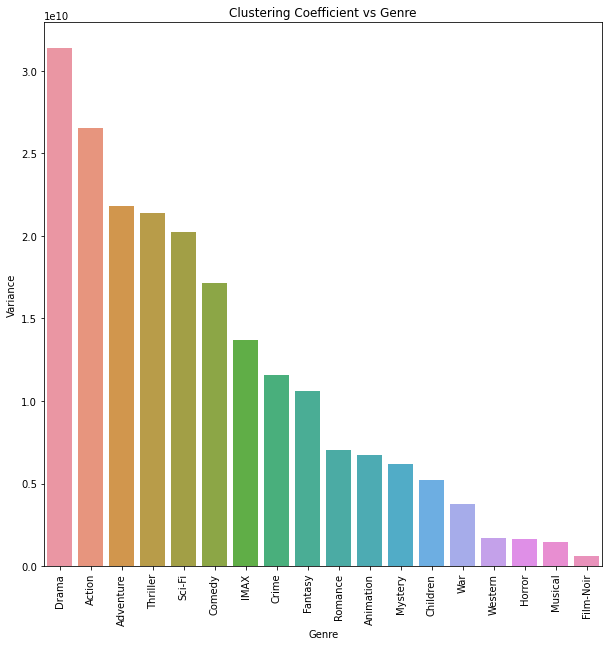

<Figure size 432x288 with 0 Axes>

In [15]:
# find the genres with the highest variance
genres = {}
for movie in movies:
    for genre in movies[movie]['genres']:
        if genre in genres:
            genres[genre] += movies[movie]['variance']
        else:
            genres[genre] = movies[movie]['variance']
genres

# sort the dictionary by value
genres = dict(sorted(genres.items(), key=lambda item: item[1], reverse=True))

# plot bargraph using sns barplot
plt.figure(figsize=(10,10))
sns.barplot(x=list(genres.keys()), y=list(genres.values()))
plt.xticks(rotation=90)
plt.ylabel('Clustering Coefficient')
plt.xlabel('Genre')
plt.title('Clustering Coefficient vs Genre')
plt.show()
# save the plot with hte title name
plt.savefig('Network Analysis vs genre.png')
